# Coding 1: Team Project



### Importing libraries

In [179]:
# Importing libraries
import pandas as pd
import statsmodels.api as sm
import numpy as np

import plotly.io as pio
import plotly.express as px
import plotly.figure_factory as ff
pio.templates.default = 'plotly'

import statsmodels.api as sm
import statsmodels.formula.api as smf
from stargazer.stargazer import Stargazer

# EXECUTIVE SUMMARY

### The CardioGood Fitness franchise is split in 2:
- on one hand moderate users, who will use the treadmill up to 3 times a week to run up to 100-110 miles with the ambition to be moderately fit. These users will buy either way TM195 or TM498. They have an average education background and are aged between 18 and 50 years old, but with no influence of age or gender (not significantly enough to segment the marketing or new product activities). 
- on the other hand, intensive users, who want to run more than 100 miles a week (on average 167 miles) and practising 4+ times per week to stay extremely fit. They are dominantly male (83% of the sample), with higher revenues (from \\$50k and above).
Marital status does not seem to play any role between the 2 groups. Influence of gender may be related to revenue.

### The 2 key discriminant factors: income and intensity/fitness level.
\\$70K is the separator between the 2 groups: all TM195 and TM498 make less than \\$70K. 60% of TM798 users are above this threshold.
But the critical element remains the fitness expectation. The TM798 is praised by heavy users, practising at least 4 times a week to stay extremely fit: over 70% of them declare to be in excellent shape.

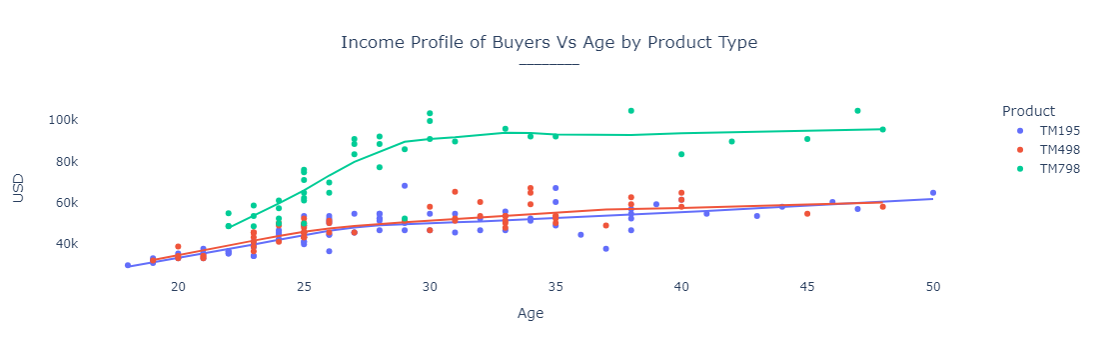

The purchase of a TM798 over the 2 other models is depending on:
- primarily income,
- secondly usage,
- marginally gender (being male).
See table below.

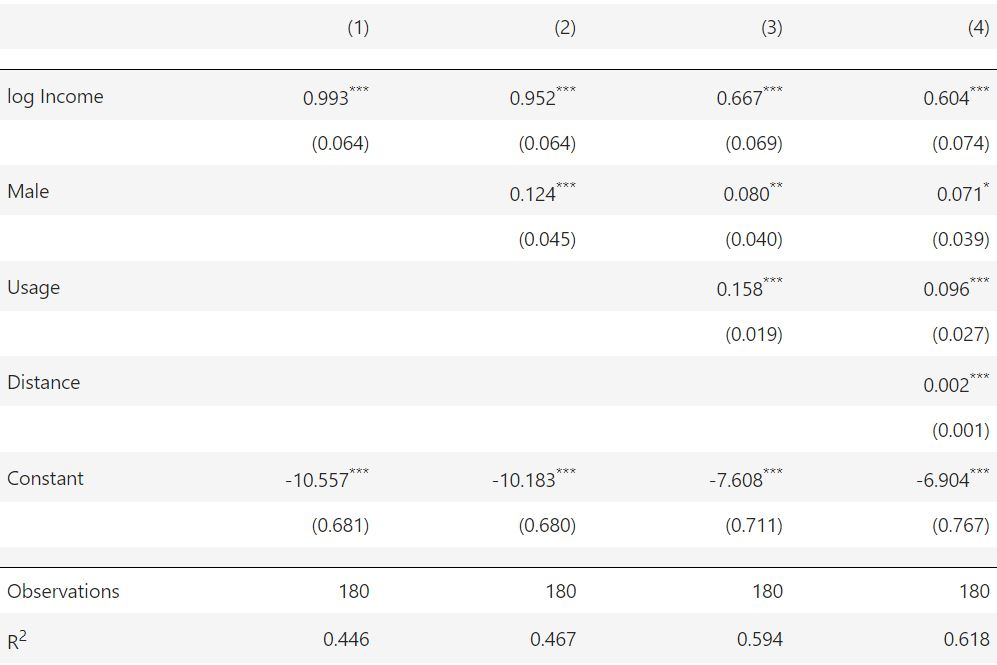



**Customer profile per product line**

* **TM195** is used by people with a moderate educational background averaging 15 years. These customers plan moderate usage, averaging 3 times per week, and are likely to cover an average distance of 82.79 miles per week. They rate their fitness at a moderate 2.96 out of 5 and maintain a moderate income, averaging $46,418. The most interesting part is, that single men tend to use this product more heavily and are more fit, than other customers, who bought the same model, as they have the highest fitness score and plans to walk/run the most. Also they are younger than the average customer of the TM195.


* **TM498** is used by people with an average educational level of 15 years. These customers opt for a moderate usage frequency of 3 times per week, expecting to cover an average distance of 88 miles per week. Their fitness rates moderately at 2.9 out of 5, yet they have a higher average income ($48,974). Like for the TM195, single men are the youngest for this model, but partnered women are the ones who want to use it more, whilst also having the highest household income.


* **TM798** users show a significantly higher education level of 17 years on average. These customers plan for a notably higher usage of 4.78 times per week and anticipate covering a substantial distance of 167 miles per week on average. They rate their fitness level notably higher at 4.63 out of 5 and possess a significantly higher income (average at $75,442). As for the TM498, partnered women also dominate this model in case of usage and fitness, while also being, the most wealthiest.


* Across all three treadmill models, the majority of customers are partnered: TM195 has 48 out of 80 customers partnered, TM498 has 36 out of 60 customers and TM798 has 23 out of 40 customers partnered.

# APPENDICES

### Uploading cardio fitness dataset

In [3]:
# Read the CardioGoodFitness.csv file into a DataFrame
df = pd.read_csv('cardio_fitness.csv')

In [4]:
# Display the columns for the dataset
print("Columns of cardio_fitness:")
print(df.columns)

Columns of cardio_fitness:
Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles'],
      dtype='object')


In [5]:
# Display of cardio fitness DataFrame
df

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
175,TM798,40,Male,21,Single,6,5,83416,200
176,TM798,42,Male,18,Single,5,4,89641,200
177,TM798,45,Male,16,Single,5,5,90886,160
178,TM798,47,Male,18,Partnered,4,5,104581,120


In [6]:
# Checking for null records
df.isna().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

# Descriptive statistics

Analysis of descriptive statistics per variable in the cardio_fitness DataFrame

## Age

In [8]:
# Descriptive statistics for 'Age' column per 'Product'

age_stats = df.groupby('Product')['Age'].describe().transpose().round(1)
age_stats

Product,TM195,TM498,TM798
count,80.0,60.0,40.0
mean,28.6,28.9,29.1
std,7.2,6.6,7.0
min,18.0,19.0,22.0
25%,23.0,24.0,24.8
50%,26.0,26.0,27.0
75%,33.0,33.2,30.2
max,50.0,48.0,48.0


**Age profile**

**_TM195_**
* There are 80 customers for this product and the average age of these customers is 29 years.
* The youngest customer is 18 years old whereas the oldest is 50 years old

**_TM498_**
* 60 customers use this product
* The average age of the customers is 29 years
* The youngesst customer is 19 years old, the oldest is 48 years old.

**_TM798_**
* 40 customers use this product
* The average age of the customers is 29 years
* The youngesst customer is 22 years old, the oldest is 48 years old.

**CardioGood Fitness customer age profile**
* TM195 is the most popular treadmill among young customers, while TM798 is focused for an older, 30 to 40 year old target segment.
* CardioGood Fitness average customer age is 28.8 years old.
* The youngest customer is 18 years old, the oldest is 50 years old.
* The median age of customers is 26 years old.

## Gender

In [9]:
# Descriptive statistics for 'Gender' column per 'Product'

gender_stats = df.groupby('Product')['Gender'].describe().transpose()
gender_stats

Product,TM195,TM498,TM798
count,80,60,40
unique,2,2,2
top,Male,Male,Male
freq,40,31,33


**Gender profile**

**_TM195_**
* Buyers are perfectly balanced 50% female / 50% male.

**_TM498_**
* Almost even: 52% male vs 48% female.
* No significant gender bias.

**_TM798_**
* Mainly male buyers: 83% of the buyers are male. 

**CardioGood Fitness profile**
* Only TM798 shows a clear gender bias (over 80% of the sample were men).
* Female customers are more likely to buy TM195: 52% of female buyers went for this model vs 38% for the TM498 and only 9% for the TM798.
* Male customers are more balanced with 38% who bought TM105, 30% went for the TM498 and 32% for the TM798.

## Education

In [10]:
# Descriptive statistics for 'Education' column per 'Product'

education_stats = df.groupby('Product')['Education'].describe().transpose().round(1)
education_stats

Product,TM195,TM498,TM798
count,80.0,60.0,40.0
mean,15.0,15.1,17.3
std,1.2,1.2,1.6
min,12.0,12.0,14.0
25%,14.0,14.0,16.0
50%,16.0,16.0,18.0
75%,16.0,16.0,18.0
max,18.0,18.0,21.0


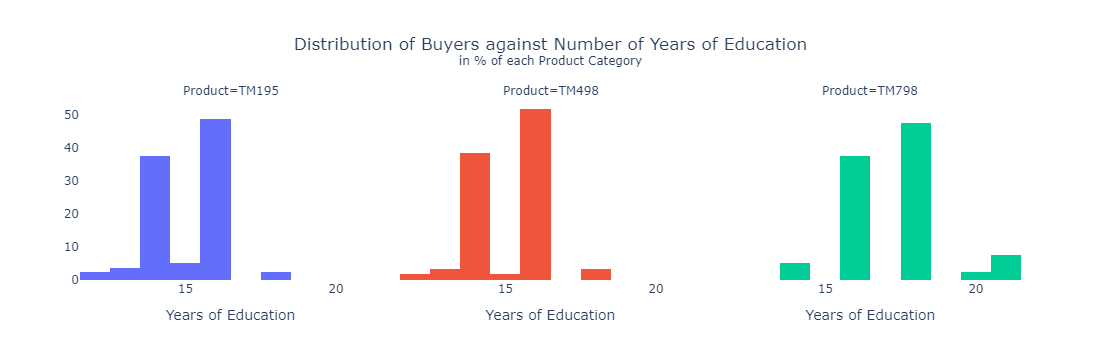

In [83]:
# Distribution of Education for each Product category

title_ = 'Distribution of Buyers against Number of Years of Education<br><sup>in % of each Product Category'
labels_ = {"Education":"Years of Education"}
educ_hist = px.histogram(df, x = 'Education',
                         histnorm = 'percent',
                         facet_col = "Product",
                         color = "Product",
                         labels = labels_,
                         title = title_)
educ_hist.update_layout(title_x = 0.5, yaxis_title = None, plot_bgcolor = 'white')
educ_hist.update_layout(showlegend = False)
educ_hist.show()

**Education profile**

**_TM195_**
* Education seems evenly spread (mean and median at 15 years, range 12-18) with 2 peaks at 14 and 16 years of education.
* TM195 buyers tend to have completed a moderate level of education, mostly within the 14 to 16 years range.

**_TM498_**
* The education mean is 15 years. Same profile as in TM195.
* Its buyers are predominantly within the 14 to 16 years bracket.

**_TM798_**
* The education mean is 17 years.
* It differs from the two other Product profiles due to 10% of its buyers (i.e. 4 people) having 20 to 21 years of education. The remainder of the buyers' profile is similar to the other products.

**CardioGood Fitness customer age profile**
* TM798 customers generally have a higher level of education compared to TM195 and TM498, with a significant portion completing 16 to 18 years of education, potentially indicating a more educated or professional customer base.
* The average education level of customers who purchase treadmills from CardioGoodFitness is 15.12 years of education.
* The minimum education level is 12 years, and the maximum education level is 21 years.
* The TM798 is more popular among customers with a bachelor's degree or more.

## Usage

In [11]:
# Descriptive statistics for 'Usage' column per 'Product'

usage_stats = df.groupby('Product')['Usage'].describe().transpose().round(1)
usage_stats

Product,TM195,TM498,TM798
count,80.0,60.0,40.0
mean,3.1,3.1,4.8
std,0.8,0.8,0.9
min,2.0,2.0,3.0
25%,3.0,3.0,4.0
50%,3.0,3.0,5.0
75%,4.0,3.2,5.0
max,5.0,5.0,7.0


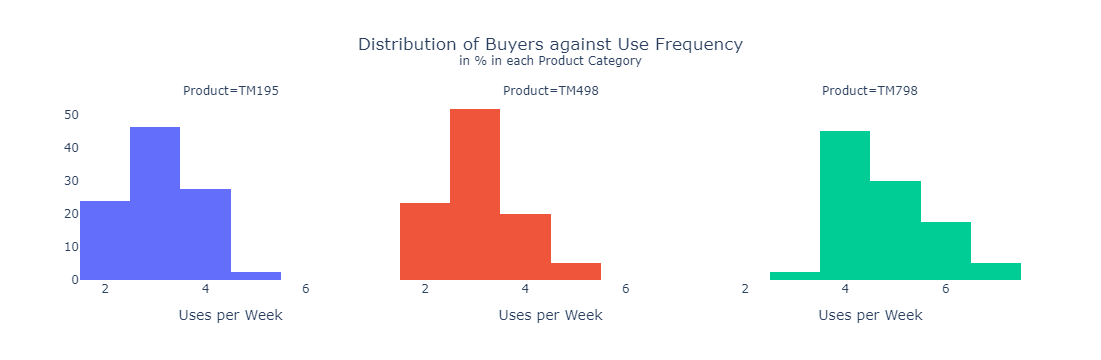

In [82]:
# Distribution of Buyers against Usage for each Product category

title_ = 'Distribution of Buyers against Use Frequency<br><sup>in % in each Product Category'
labels_ = {"Usage":"Uses per Week"}
usage_hist = px.histogram(df, x = 'Usage',
                          histnorm = 'percent',
                          facet_col = "Product",
                          color = "Product",
                          labels = labels_,
                          title = title_)
usage_hist.update_layout(title_x = 0.5, yaxis_title = None, plot_bgcolor = 'white')
usage_hist.update_layout(showlegend = False)
usage_hist.show()

**Usage profile**

**_TM195_**
* Mean usage: 3 times/week
* Usage range: 2 to 5 times/week
* Most customers plan to use the treadmill around 3 to 4 times per week.
* The majority of customers fall within the 3 to 3.25 times/week usage range--> moderate use.

**_TM498_**
* Mean usage: 3 times/week
* Usage range: 2 to 5 times/week
* Most customers plan to use the treadmill around 3 to 3.25 times per week--> low/moderate use.

**_TM798_**
* Mean usage: 5 times/week
* Usage range: 3 to 7 times/week
* Most customers plan to use the treadmill around 4 to 5 times per week--> high use

**CardioGood Fitness customer usage profile**
* Treadmills TM195 & TM498 are products for moderate usage, typically around 3 times per week, with a range from 2 to 5 times per week.
* Treadmill TM798 aims for a higher usage frequency, averaging around 5 times per week, with a range from 3 to 7 times per week. 

## Fitness

In [12]:
# Descriptive statistics for 'Fitness' column per 'Product'

fit_stats = df.groupby('Product')['Fitness'].describe().transpose().round(1)
fit_stats

Product,TM195,TM498,TM798
count,80.0,60.0,40.0
mean,3.0,2.9,4.6
std,0.7,0.6,0.7
min,1.0,1.0,3.0
25%,3.0,3.0,4.0
50%,3.0,3.0,5.0
75%,3.0,3.0,5.0
max,5.0,4.0,5.0


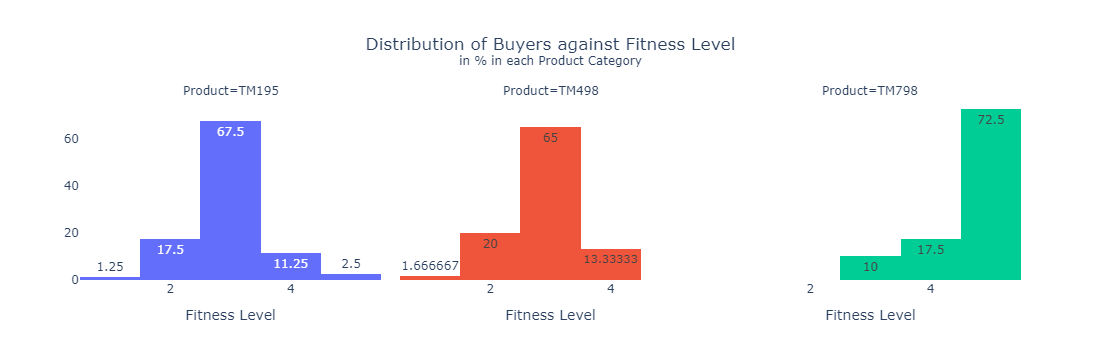

In [256]:
# Distribution of Buyers against the Fitness Level for each Product category

title_ = 'Distribution of Buyers against Fitness Level<br><sup>in % in each Product Category'
labels_ = {"Fitness":"Fitness Level"}
fit_hist = px.histogram(df, x = 'Fitness',
                          histnorm = 'percent',
                          facet_col = "Product",
                          color = "Product",
                          text_auto = True,
                          labels = labels_,
                          title = title_,)
fit_hist.update_layout(title_x = 0.5, yaxis_title = None, plot_bgcolor = 'white')
fit_hist.update_layout(showlegend = False)
fit_hist.show()

**Fitness profile**

**_TM195_**
* Mean fitness rating: 3/5
* Fitness range: 1-5
* The majority of customers generally rate their fitness moderately, with the majority scoring themselves a 3 out of 5.

**_TM498_**
* Mean fitness rating: 3/5
* Fitness range: 1-4
* Customers also generally rate their fitness moderately, similar to TM195, with the majority scoring themselves a 3 out of 5.ir fitness moderately, with the majority scoring themselves a 3 out of 5.

**_TM798_**
* Mean fitness rating: 4.6/5
* Fitness range: 3-5
* Most customers plan to use the treadmill around 3 to 4 times per week.
* Users rate their fitness significantly higher compared to TM195 and TM498, with a majority scoring themselves a 5 out of 5, indicating a perception of excellent fitness.

**CardioGood Fitness customer fitness profile**
* Customers across both TM195 and TM498 rate their fitness similarly, with a majority perceiving themselves at a moderate fitness level, typically scoring 3 out of 5.
* M798 stands out with customers rating their fitness significantly higher with a peak at 5/5.

## Marital Status

In [13]:
# Descriptive statistics for 'MaritalStatus' column per 'Product'

income_stats = df.groupby('Product')['MaritalStatus'].describe().transpose()
income_stats

Product,TM195,TM498,TM798
count,80,60,40
unique,2,2,2
top,Partnered,Partnered,Partnered
freq,48,36,23


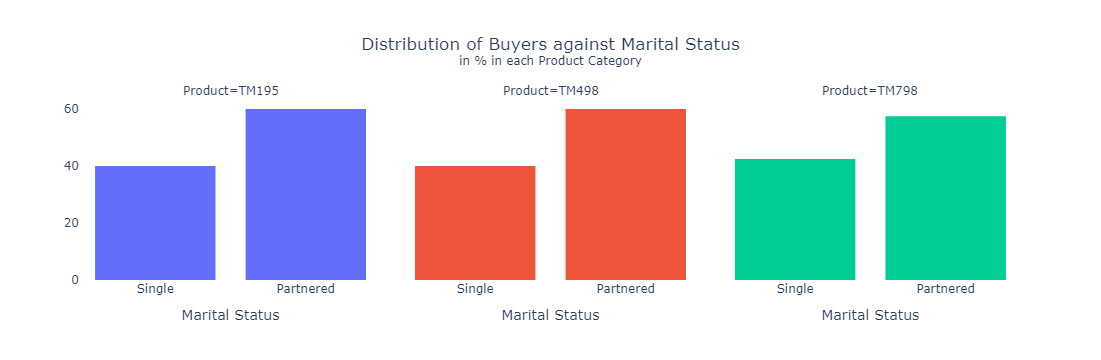

In [88]:
# Distribution of Buyers per Parital Status for each Product category

title_ = 'Distribution of Buyers against Marital Status<br><sup>in % in each Product Category'
labels_ = {"MaritalStatus":"Marital Status"}
marit_hist = px.histogram(df, x = 'MaritalStatus',
                          histnorm = 'percent',
                          facet_col = "Product",
                          color = "Product",
                          labels = labels_,
                          title = title_)
marit_hist.update_layout(title_x = 0.5, yaxis_title = None, plot_bgcolor = 'white')
marit_hist.update_layout(showlegend = False)
marit_hist.show()

**Marital status profile**

**_TM195_**
* 48 out of 80 customers are partnered.

**_TM498_**
* 36 out of 60 customers are partnered.

**_TM798_**
* 23 out of 40 customers are partnered.

**CardioGood Fitness customer marital status profile**
* Partnered status holds the highest frequency among customers for each treadmill, indicating that partnered customers are the predominant group across all three product lines.
* Partner Status does not play a role in the Model Buying Pattern.

## Miles

In [212]:
# Descriptive statistics for 'Miles' column per 'Product'

miles_stats = df.groupby('Product')['Miles'].describe().transpose().round()
miles_stats

Product,TM195,TM498,TM798
count,80.0,60.0,40.0
mean,83.0,88.0,167.0
std,29.0,33.0,60.0
min,38.0,21.0,80.0
25%,66.0,64.0,120.0
50%,85.0,85.0,160.0
75%,94.0,106.0,200.0
max,188.0,212.0,360.0


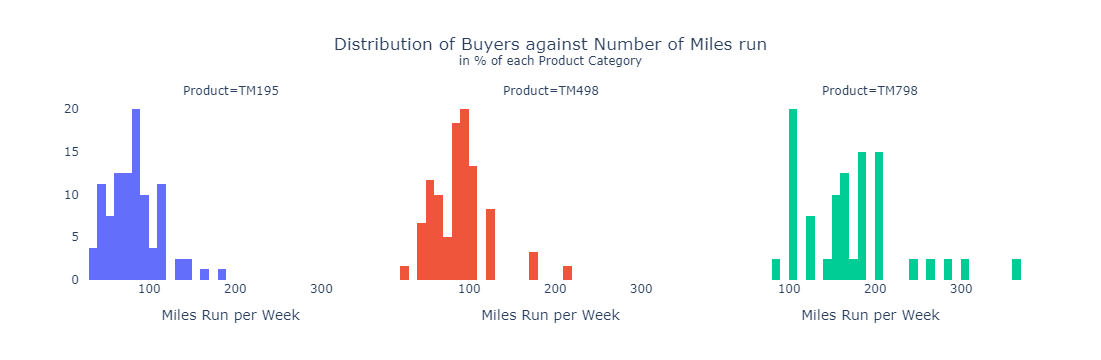

In [213]:
# Distribution of Mileage for each Product category

title_ = 'Distribution of Buyers against Number of Miles run<br><sup>in % of each Product Category'
labels_ = {"Miles":"Miles Run per Week"}
miles_hist = px.histogram(df, x = 'Miles',
                         histnorm = 'percent',
                         facet_col = "Product",
                         color = "Product",
                         labels = labels_,
                         title = title_)
miles_hist.update_layout(title_x = 0.5, yaxis_title = None, plot_bgcolor = 'white')
miles_hist.update_layout(showlegend = False)
miles_hist.update_traces(xbins_size = 10)
miles_hist.show()

**Miles profile**

**_TM195_**
* Mean Miles: 83 miles/week
* Miles Range: 38 to 188 miles/week
* Customers tend to cover moderate distances such as 66 to 94 miles per week

**_TM498_**
* Mean Miles: 88 miles/week
* Miles Range: 21 to 212 miles/week
* Customers plan to cover between 64 and 106 miles per week - wider spread than with TM195.

**_TM798_**
* Mean Miles: 167 miles/week
* Miles Range: 80 to 360 miles/week
* Customers cover longer distances per week, between 120 and 360 miles. 

**CardioGood Fitness customer miles profile**
* TM195 and TM498 have a similar usage regarding the distance covered per week (roughly upto 100 miles per week, true for 75% of them).
* TM798 stands out with some customers having substantially higher expectations in terms of weekly mileage: 25% of TM798 users run over 200 miles per week, almost all of them running over 10O miles.

## Income

In [16]:
# Descriptive statistics for 'Income' column per 'Product'

income_stats = df.groupby('Product')['Income'].describe().transpose().round()
income_stats

Product,TM195,TM498,TM798
count,80.0,60.0,40.0
mean,46418.0,48974.0,75442.0
std,9076.0,8654.0,18506.0
min,29562.0,31836.0,48556.0
25%,38658.0,44912.0,58205.0
50%,46617.0,49460.0,76568.0
75%,53439.0,53439.0,90886.0
max,68220.0,67083.0,104581.0


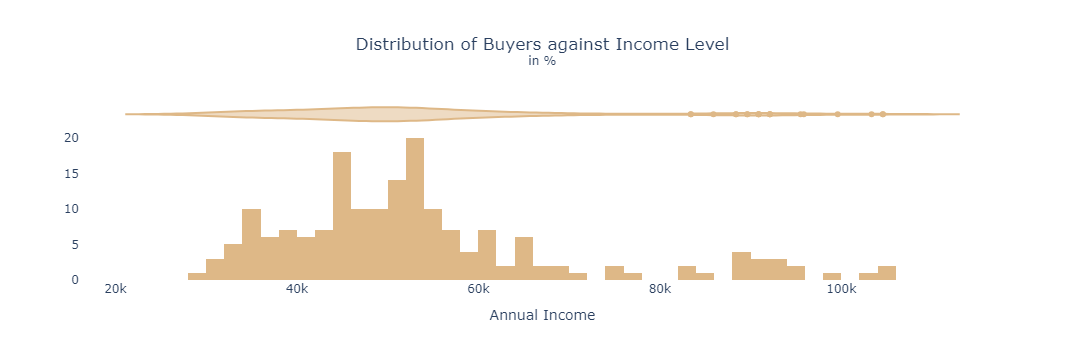

In [154]:
# Distribution of Buyers against Income Level (all categories of product)

title_ = 'Distribution of Buyers against Income Level<br><sup>in %'
labels_ = {"Income":"Annual Income"}
dist = px.histogram(df, x = 'Income', labels = labels_, title = title_, marginal = 'violin', nbins = 50)
dist.update_layout(title_x = 0.5, yaxis_title = None, plot_bgcolor = 'white')
dist.update_traces(marker_color = 'burlywood')
dist.show()

**Please note: profile of income much higher than the average population with a peak at \\$52K
______________________________________________________________________________________________________________________________________________

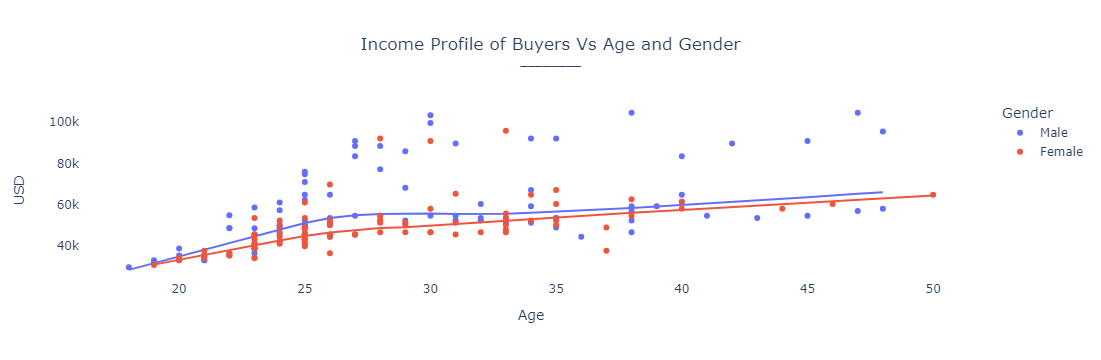

In [145]:
# Income Profile of Buyers Vs Age and Gender (all categories of product)

title_ = 'Income Profile of Buyers Vs Age and Gender<br><sup>________'
labels_ = {"Income":"Annual Income"}
inc_scat = px.scatter(df,
                      x = 'Age',
                      y = 'Income',
                      color = 'Gender',
                      trendline = 'lowess',
                      labels = labels_,
                      title = title_)
inc_scat.update_layout(title_x = 0.5, yaxis_title = "USD", plot_bgcolor = 'white')
inc_scat.show()

**Please note: limited discrepancy between Genders as illustrated by Lowess lines, the dynamics are very similar.<br>
**Main difference is in the \\$80 to 100K range with a lot more male aged buyers.
______________________________________________________________________________________________________________________________________________

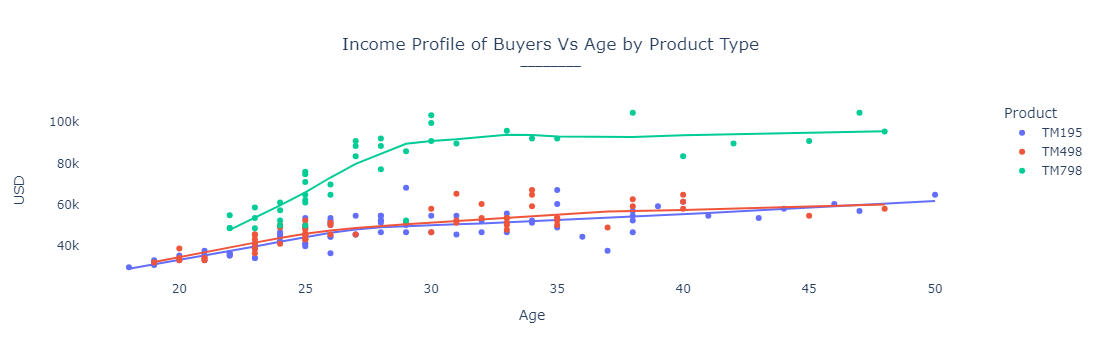

In [233]:
# Income Profile of Buyers Vs Age by Product

title_ = 'Income Profile of Buyers Vs Age by Product Type<br><sup>________'
labels_ = {"Income":"Annual Income"}
inc_scat = px.scatter(df,
                      x = 'Age',
                      y = 'Income',
                      color = 'Product',
                      trendline = 'lowess',
                      labels = labels_,
                      title = title_)
inc_scat.update_layout(title_x = 0.5, yaxis_title = "USD", plot_bgcolor = 'white')
inc_scat.show()

** Patterns for TM195 and TM498 are very similar.<br>
** TM798 attracts much higher incomes.
__________________________________________________________________________________________________________________________________________

In [229]:
# As often for income analysis, we check log(income).
# Does not change dramatically the picture, slightly "flattens" the increase in income with a more linear progression.

df["lnIncome"] = np.log(df["Income"])

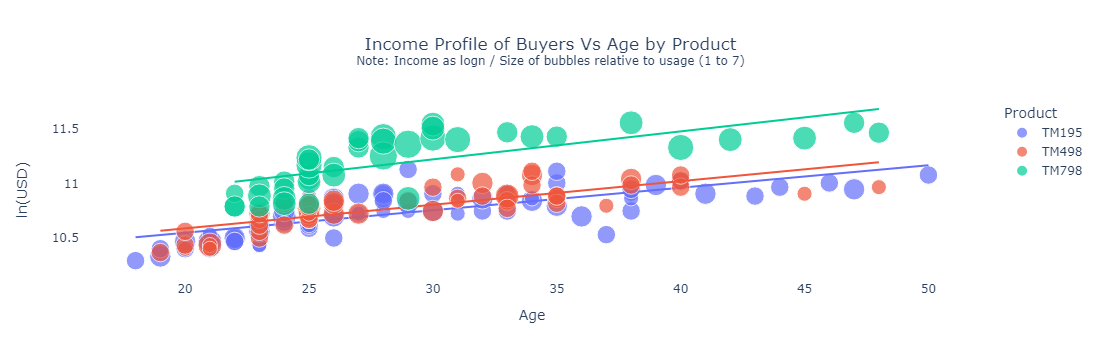

In [239]:
# Income Profile of Buyers Vs Age by Product

title_ = 'Income Profile of Buyers Vs Age by Product<br><sup>Note: Income as logn / Size of bubbles relative to usage (1 to 7)'
labels_ = {"Income":"Log(Annual Income)"}
inc_log_scat = px.scatter(df,
                          x = 'Age',
                          y = 'lnIncome',
                          color = 'Product',
                          size = 'Usage',
                          trendline = 'ols',
                          labels = labels_,
                          title = title_)
inc_log_scat.update_layout(title_x = 0.5, yaxis_title = "ln(USD)", plot_bgcolor = 'white')
inc_log_scat.show()

** OLS line for TM798 fits better log(Income) as eluded by logarithmic shape against income.<br>
** Whilst TM195 and TM498 are almost identical.<br>
** Slopes of all 3 products are very similar.
__________________________________________________________________________________________________________________________________________

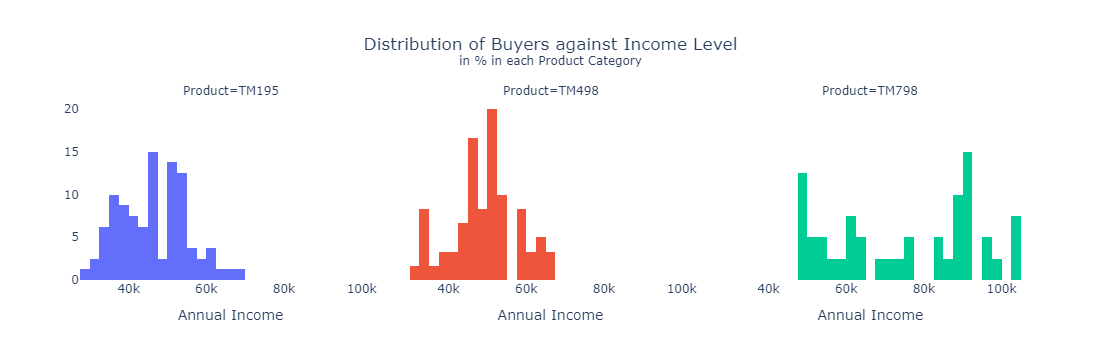

In [103]:
# Distribution of Buyers against Income Level for each Product category
title_ = 'Distribution of Buyers against Income Level<br><sup>in % in each Product Category'
labels_ = {"Income":"Annual Income"}
inc_hist = px.histogram(df, x = 'Income',
                        histnorm = 'percent',
                        facet_col = "Product",
                        color = "Product",
                        labels = labels_,
                        title = title_)
inc_hist.update_layout(title_x = 0.5, yaxis_title = None, plot_bgcolor = 'white')
inc_hist.update_layout(showlegend = False)
inc_hist.update_traces(xbins_size = 2500)
inc_hist.show()

**Income profile**

Income is a critical element of buying behavior. 

**_TM195_**
* Mean Income:  \\$46,418 
* Income Range: \\$29,562 to \\$68,220
* Customers tend to have a moderate income level, with the majority falling within the \\$38,658 to \\$53,439 range.

**_TM498_**
* Mean Income: \\$48,973
* Income Range: \\$31,836 to $67,083
* Customers also have a moderate income level, similar to TM195, with the majority falling within the \\$45K to \\$55K range.

**_TM798_**
* Mean Income: \\$75,442
* Income Range: \\$48,556 to \\$104,581
* Customers have a higher income level compared to TM195 and TM498, with the majority falling within the \\$60K to \\$90 range.

**CardioGood Fitness customer income profile**
* Buyers of both TM195 and TM498 have similar income distributions, with buyers' income in the \\$30 to 70K bracket: no one below 29.5K and no customer above \\$70K in the studied sample. 
* Opposedly, TM798 customers are significantly more affluent with incomes starting at \\$48K.

## Regression Analysis

In [192]:
# Creating Dummy for TM798

premium = []
for i in df["Product"]:
    if i == "TM798":
        premium.append(1)
    else:
        premium.append(0)
df['Premium'] = premium

In [197]:
# Creating Dummy for Gender = Male

male = []
for i in df["Gender"]:
    if i == "Male":
        male.append(1)
    else:
        male.append(0)
df['Male'] = male

In [195]:
# First regression of Premium (TM798) against log(Income)

reg1 = smf.ols(formula="Premium~lnIncome", data = df).fit(cov_type="HC1")
reg1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Premium   R-squared:                       0.446
Model:                            OLS   Adj. R-squared:                  0.443
Method:                 Least Squares   F-statistic:                     244.8
Date:                Fri, 15 Dec 2023   Prob (F-statistic):           2.86e-35
Time:                        04:44:17   Log-Likelihood:                -44.195
No. Observations:                 180   AIC:                             92.39
Df Residuals:                     178   BIC:                             98.77
Df Model:                           1                                         
Covariance Type:                  HC1                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -10.5575      0.681    -15.505      0.000     -11.892      -9.223
lnIncome       0.9935      0.064     15.645      0.000       0.869       1.118
==============================================================================
Omnibus:                       21.487   Durbin-Watson:                   0.287
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               25.434
Skew:                           0.901   Prob(JB):                     3.00e-06
Kurtosis:                       3.384   Cond. No.                         425.
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC1)
"""

In [199]:
# Adding Gender

reg2 = smf.ols(formula="Premium~lnIncome+Male", data = df).fit(cov_type="HC1")
reg2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Premium   R-squared:                       0.467
Model:                            OLS   Adj. R-squared:                  0.461
Method:                 Least Squares   F-statistic:                     133.0
Date:                Fri, 15 Dec 2023   Prob (F-statistic):           5.45e-36
Time:                        04:49:07   Log-Likelihood:                -40.741
No. Observations:                 180   AIC:                             87.48
Df Residuals:                     177   BIC:                             97.06
Df Model:                           2                                         
Covariance Type:                  HC1                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -10.1826      0.680    -14.976      0.000     -11.515      -8.850
lnIncome       0.9523      0.064     14.922      0.000       0.827       1.077
Male           0.1237      0.045      2.728      0.006       0.035       0.213
==============================================================================
Omnibus:                       18.659   Durbin-Watson:                   0.402
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.362
Skew:                           0.829   Prob(JB):                     2.30e-05
Kurtosis:                       3.317   Cond. No.                         431.
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC1)
"""

In [235]:
# Adding Usage (note that Usage and Fitness are highly correlated and perform similarly - we keep Usage as it is easier to classify prospective customers.

reg3 = smf.ols(formula="Premium~lnIncome+Male+Usage", data = df).fit(cov_type="HC1")
reg3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Premium   R-squared:                       0.594
Model:                            OLS   Adj. R-squared:                  0.587
Method:                 Least Squares   F-statistic:                     150.6
Date:                Fri, 15 Dec 2023   Prob (F-statistic):           2.22e-48
Time:                        06:13:58   Log-Likelihood:                -16.378
No. Observations:                 180   AIC:                             40.76
Df Residuals:                     176   BIC:                             53.53
Df Model:                           3                                         
Covariance Type:                  HC1                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -7.6077      0.711    -10.697      0.000      -9.002      -6.214
lnIncome       0.6670      0.069      9.667      0.000       0.532       0.802
Male           0.0798      0.040      1.972      0.049       0.001       0.159
Usage          0.1583      0.019      8.271      0.000       0.121       0.196
==============================================================================
Omnibus:                       15.452   Durbin-Watson:                   0.756
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.013
Skew:                           0.742   Prob(JB):                     0.000202
Kurtosis:                       3.253   Cond. No.                         495.
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC1)
"""

In [211]:
# Adding Miles (note that Miles and Usage/Fitness are dependent variables).

reg4 = smf.ols(formula="Premium~lnIncome+Male+Usage+Miles", data = df).fit(cov_type="HC1")
reg4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Premium   R-squared:                       0.618
Model:                            OLS   Adj. R-squared:                  0.609
Method:                 Least Squares   F-statistic:                     117.9
Date:                Fri, 15 Dec 2023   Prob (F-statistic):           1.40e-48
Time:                        05:13:18   Log-Likelihood:                -10.918
No. Observations:                 180   AIC:                             31.84
Df Residuals:                     175   BIC:                             47.80
Df Model:                           4                                         
Covariance Type:                  HC1                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -6.9038      0.767     -9.000      0.000      -8.407      -5.400
lnIncome       0.6038      0.074      8.194      0.000       0.459       0.748
Male           0.0710      0.039      1.837      0.066      -0.005       0.147
Usage          0.0956      0.027      3.592      0.000       0.043       0.148
Miles          0.0020      0.001      3.177      0.001       0.001       0.003
==============================================================================
Omnibus:                       19.447   Durbin-Watson:                   0.801
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               22.236
Skew:                           0.816   Prob(JB):                     1.48e-05
Kurtosis:                       3.548   Cond. No.                     5.17e+03
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC1)
[2] The condition number is large, 5.17e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [205]:
# Assessing best modelling for TM798
stargazer = Stargazer([reg1, reg2, reg3, reg4])
stargazer.covariate_order(["lnIncome", "Male", "Usage", "Miles", "Intercept"])
stargazer.rename_covariates({"lnIncome":"log Income", "Miles":"Distance", "Intercept": "Constant"})
stargazer

### All regression analysis perform very strongly at 99% confidence level on both slope and intercept. For simplification and segmentation purposes, we suggest to drop the fourth variables (Miles) and keep the first 3: income, gender and usage intensity. The correlation is high at 0.77.

In [217]:
# Dummy TM195+TM498
entry = []
for i in df["Product"]:
    if i == "TM195":
        entry.append(1)
    elif i == "TM498":
        entry.append(1)
    else:
        entry.append(0)
df['Entry'] = entry

In [220]:
reg5 = smf.ols(formula="Entry~Age", data = df).fit(cov_type="HC1")
reg5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Entry   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.005
Method:                 Least Squares   F-statistic:                    0.1046
Date:                Fri, 15 Dec 2023   Prob (F-statistic):              0.747
Time:                        05:32:38   Log-Likelihood:                -97.372
No. Observations:                 180   AIC:                             198.7
Df Residuals:                     178   BIC:                             205.1
Df Model:                           1                                         
Covariance Type:                  HC1                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8193      0.131      6.251      0.000       0.562       1.076
Age           -0.0014      0.004     -0.323      0.746      -0.010       0.007
==============================================================================
Omnibus:                       36.156   Durbin-Watson:                   0.035
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.821
Skew:                          -1.335   Prob(JB):                     2.06e-12
Kurtosis:                       2.786   Cond. No.                         127.
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC1)
"""

In [221]:
reg6 = smf.ols(formula="Entry~Male", data = df).fit(cov_type="HC1")
reg6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Entry   R-squared:                       0.072
Model:                            OLS   Adj. R-squared:                  0.066
Method:                 Least Squares   F-statistic:                     15.76
Date:                Fri, 15 Dec 2023   Prob (F-statistic):           0.000104
Time:                        05:33:12   Log-Likelihood:                -90.739
No. Observations:                 180   AIC:                             185.5
Df Residuals:                     178   BIC:                             191.9
Df Model:                           1                                         
Covariance Type:                  HC1                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9079      0.033     27.218      0.000       0.843       0.973
Male          -0.2252      0.057     -3.969      0.000      -0.336      -0.114
==============================================================================
Omnibus:                       29.862   Durbin-Watson:                   0.210
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               40.885
Skew:                          -1.160   Prob(JB):                     1.32e-09
Kurtosis:                       2.729   Cond. No.                         2.84
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC1)
"""

In [222]:
reg7 = smf.ols(formula="Entry~Usage", data = df).fit(cov_type="HC1")
reg7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Entry   R-squared:                       0.425
Model:                            OLS   Adj. R-squared:                  0.422
Method:                 Least Squares   F-statistic:                     180.8
Date:                Fri, 15 Dec 2023   Prob (F-statistic):           6.73e-29
Time:                        05:34:33   Log-Likelihood:                -47.612
No. Observations:                 180   AIC:                             99.22
Df Residuals:                     178   BIC:                             105.6
Df Model:                           1                                         
Covariance Type:                  HC1                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.6436      0.052     31.600      0.000       1.542       1.746
Usage         -0.2506      0.019    -13.446      0.000      -0.287      -0.214
==============================================================================
Omnibus:                       10.787   Durbin-Watson:                   0.797
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               11.595
Skew:                          -0.621   Prob(JB):                      0.00304
Kurtosis:                       2.945   Cond. No.                         13.0
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC1)
"""

In [225]:
reg8 = smf.ols(formula="Entry~Fitness", data = df).fit(cov_type="HC1")
reg8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Entry   R-squared:                       0.539
Model:                            OLS   Adj. R-squared:                  0.537
Method:                 Least Squares   F-statistic:                     174.8
Date:                Fri, 15 Dec 2023   Prob (F-statistic):           3.03e-28
Time:                        05:35:53   Log-Likelihood:                -27.644
No. Observations:                 180   AIC:                             59.29
Df Residuals:                     178   BIC:                             65.67
Df Model:                           1                                         
Covariance Type:                  HC1                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.8351      0.076     24.089      0.000       1.686       1.984
Fitness       -0.3193      0.024    -13.222      0.000      -0.367      -0.272
==============================================================================
Omnibus:                       14.672   Durbin-Watson:                   1.159
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               18.206
Skew:                          -0.557   Prob(JB):                     0.000111
Kurtosis:                       4.089   Cond. No.                         13.4
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC1)
"""

In [226]:
# Assessing best modelling for TM798
stargazer = Stargazer([reg5, reg6, reg7, reg8])
stargazer.covariate_order(["Age", "Male", "Usage", "Fitness", "Intercept"])
stargazer.rename_covariates({"Intercept": "Constant"})
stargazer

### As expected, TM195 and TM498 do not relate to age, moderately with gender (very low R2 though). More significant are Usage or Fitness, with a correlation above 0.65 and both with a 99% confidence level: slope is negative for both, as compared with TM798, with Usage at -0.25 (3 times a week max) or Fitness at -0.32 (average i.e. 3 and below).

## CardioGood Fitness customer profile

In [18]:
# Descriptive statistics overview per 'Product' for all variables
product_stats=df.groupby(["Product","MaritalStatus","Gender"]).agg("mean").round(1)
product_stats

Age  Education  Usage  Fitness   Income  Miles
Product MaritalStatus Gender                                                 
TM195   Partnered     Female  28.3       14.9    2.9      2.9  46153.8   74.9
                      Male    31.4       15.4    3.3      2.9  50028.0   80.2
        Single        Female  28.7       15.5    3.0      2.9  45742.4   78.8
                      Male    25.6       14.5    3.3      3.3  43265.8   99.5
TM498   Partnered     Female  30.0       15.2    3.3      2.9  49724.8   94.0
                      Male    30.4       15.3    2.9      2.9  49378.3   87.2
        Single        Female  28.1       15.2    2.9      2.8  48920.4   80.2
                      Male    25.2       14.5    3.3      3.0  47071.8   91.1
TM798   Partnered     Female  29.0       17.5    5.2      5.0  84972.2  215.0
                      Male    30.0       17.4    4.8      4.6  81431.4  176.3
        Single        Female  24.3       18.3    4.7      4.0  58516.0  133.3
                      Male    28.9       16.9    4.6      4.6  68216.4  147.6